In [17]:
import gensim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from DBSCAN import evaluate
import numpy as np


In [ ]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('E:/Datasets/NLP/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)  

In [2]:
model.most_similar(positive=['woman','king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [3]:
chair = "A chair is a type of seat, typically designed for one person and consisting of one or more legs, a flat or slightly angled seat and a back-rest. They may be made of wood, metal, or synthetic materials, and may be padded or upholstered in various colors and fabrics."

In [4]:
bull = "A male organism cannot reproduce sexually without access to at least one ovum from a female, but some organisms can reproduce both sexually and asexually. Most male mammals, including male humans, have a Y chromosome, which codes for the production of larger amounts of testosterone to develop male reproductive organs. Not all species share a common sex-determination system. In most animals, including humans, sex is determined genetically; however, species such as Cymothoa exigua change sex depending on the number of females present in the vicinity."

In [5]:
vectors = []
label = []

for word in chair.split(" "):
    try:
        vectors.append(model.get_vector(word))
        label.append(0)
    except:
        pass

for word in bull.split(" "):
    try:
        vectors.append(model.get_vector(word))
        label.append(1)
    except:
        pass

Estimated number of clusters: 6
Estimated number of noise points: 11
Homogeneity: 0.103
Completeness: 0.077
V-measure: 0.088
Adjusted Rand Index: -0.009
Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.282
7


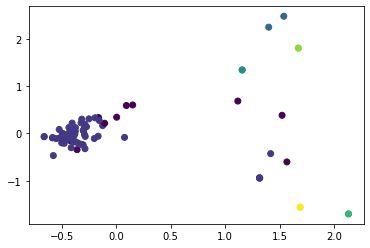

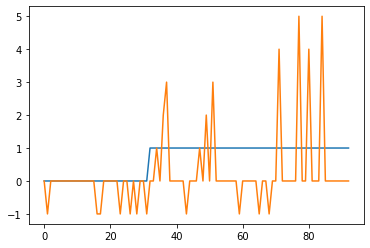

In [40]:
eps = 3
minPts = 2

clustering = DBSCAN(eps=eps, min_samples=minPts).fit(vectors)
labels = clustering.labels_

evaluate(labels, label, vectors)

print(len(np.unique(labels)))

pca = PCA()
Xt = pca.fit_transform(vectors)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.show()

plt.plot(label)
plt.plot(labels)
plt.show()